<a href="https://colab.research.google.com/github/Sauptik23/Identification-of-medicinal-plants/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic imports and stuff

In [ ]:
import tensorflow as tf

In [ ]:
!nvidia-smi

Wed Sep 20 07:45:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

!pip install -q kaggle


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od
from numpy.ma.core import true_divide
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
from keras.api._v2.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip,RandomRotation,RandomZoom,RandomHeight,RandomWidth
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.efficientnet import EfficientNetB3,EfficientNetB5,EfficientNetB2
from keras.layers import Flatten, Dense,Dropout,Input
from keras.layers import GlobalAveragePooling2D
import tensorflow_hub as hub

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/aryashah2k/indian-medicinal-leaves-dataset"
    )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sauptikmukherjee
Your Kaggle Key: ··········


100%|██████████| 9.00G/9.00G [02:11<00:00, 73.4MB/s]


\#Inspecting the dataset

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("Indian Medicinal Leaves Image Datasets"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Indian Medicinal Leaves Image Datasets'.
There are 40 directories and 0 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset'.
There are 0 directories and 146 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Lemon'.
There are 0 directories and 146 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Brahmi'.
There are 0 directories and 146 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Curry_Leaf'.
There are 0 directories and 146 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Pappaya'.
There are 0 directories and 151 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Betel'.
There are 0 directories and 146 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Insulin'.
There are 0 directories and 146 images in 'Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Ashwagandha

#View Random Image

In [ ]:
#view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(img.shape)
  return img

#Creating train-test-val split

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

In [ ]:
path_leaves="/content/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset"
splitfolders.ratio(path_leaves,seed=1337, output="(Splitted)Indian Medicininal Leaves Dataset", ratio=(0.6, 0.2, 0.2))

Copying files: 6904 files [01:22, 83.69 files/s] 


In [ ]:
path_plant="/content/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset"
splitfolders.ratio(path_plant,seed=1337, output="2_(Splitted)_Indian Medicininal Plants Dataset", ratio=(0.6, 0.2, 0.2))

#Storing class names in class_names


##Leaves Class_Names

In [ ]:
import pathlib
import numpy as np
data_dir_leaves = pathlib.Path("/content/(Splitted)Indian Medicininal Leaves Dataset/train") # turn our training path into a Python path
class_names_leaves = np.array(sorted([item.name for item in data_dir_leaves.glob('*')])) # created a list of class_names from the subdirectories
print(class_names_leaves)

['Aloevera' 'Amla' 'Amruthaballi' 'Arali' 'Astma_weed' 'Badipala'
 'Balloon_Vine' 'Bamboo' 'Beans' 'Betel' 'Bhrami' 'Bringaraja'
 'Caricature' 'Castor' 'Catharanthus' 'Chakte' 'Chilly'
 'Citron lime (herelikai)' 'Coffee' 'Common rue(naagdalli)' 'Coriender'
 'Curry' 'Doddpathre' 'Drumstick' 'Ekka' 'Eucalyptus' 'Ganigale' 'Ganike'
 'Gasagase' 'Ginger' 'Globe Amarnath' 'Guava' 'Henna' 'Hibiscus' 'Honge'
 'Insulin' 'Jackfruit' 'Jasmine' 'Kambajala' 'Kasambruga' 'Kohlrabi'
 'Lantana' 'Lemon' 'Lemongrass' 'Malabar_Nut' 'Malabar_Spinach' 'Mango'
 'Marigold' 'Mint' 'Neem' 'Nelavembu' 'Nerale' 'Nooni' 'Onion' 'Padri'
 'Palak(Spinach)' 'Papaya' 'Parijatha' 'Pea' 'Pepper' 'Pomoegranate'
 'Pumpkin' 'Raddish' 'Rose' 'Sampige' 'Sapota' 'Seethaashoka' 'Seethapala'
 'Spinach1' 'Tamarind' 'Taro' 'Tecoma' 'Thumbe' 'Tomato' 'Tulsi'
 'Turmeric' 'ashoka' 'camphor' 'kamakasturi' 'kepala']


In [ ]:
len(class_names_leaves)

80

##Plant_Class_names

In [ ]:
import pathlib
import numpy as np
data_dir_plant=pathlib.Path("/content/2_(Splitted)_Indian Medicininal Plants Dataset/train")
class_names_plant=np.array(sorted([item.name for item in data_dir_plant.glob('*')]))
print(len(class_names_plant))
print(class_names_plant)

40
['Aloevera' 'Amla' 'Amruta_Balli' 'Arali' 'Ashoka' 'Ashwagandha' 'Avacado'
 'Bamboo' 'Basale' 'Betel' 'Betel_Nut' 'Brahmi' 'Castor' 'Curry_Leaf'
 'Doddapatre' 'Ekka' 'Ganike' 'Gauva' 'Geranium' 'Henna' 'Hibiscus'
 'Honge' 'Insulin' 'Jasmine' 'Lemon' 'Lemon_grass' 'Mango' 'Mint'
 'Nagadali' 'Neem' 'Nithyapushpa' 'Nooni' 'Pappaya' 'Pepper' 'Pomegranate'
 'Raktachandini' 'Rose' 'Sapota' 'Tulasi' 'Wood_sorel']


#Normalizing the data and turning it into batches

In [ ]:
# from numpy.ma.core import true_divide
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Rescale the data and create data generator instances
# train_datagen = ImageDataGenerator(rescale=1/255.,
#                                    width_shift_range=0.2,
#                                    zoom_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    rotation_range=0.2)
# test_datagen = ImageDataGenerator(rescale=1/255.)
# valid_datagen=ImageDataGenerator(rescale=1/255.)
# train_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/train"
# test_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/test"
# valid_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/val"

# IMAGE_SHAPE=(600,450)
# # Load data in from directories and turn it into batches
# train_data_leaves = train_datagen.flow_from_directory(train_dir,
#                                                target_size=IMAGE_SHAPE,
#                                                batch_size=32,
#                                                class_mode='categorical') # changed to categorical

# test_data_leaves = train_datagen.flow_from_directory(test_dir,
#                                               target_size=IMAGE_SHAPE,
#                                               batch_size=32,
#                                               class_mode='categorical')
# valid_data_leaves=valid_datagen.flow_from_directory(valid_dir,
#                                          target_size=IMAGE_SHAPE,
#                                          batch_size=32,
#                                          class_mode='categorical')

Found 4106 images belonging to 80 classes.
Found 1448 images belonging to 80 classes.
Found 1346 images belonging to 80 classes.


In [ ]:
IMAGE_SIZE=(224,224)
train_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/train"
test_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/test"
valid_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/val"

In [ ]:

train_data_leaves=image_dataset_from_directory(train_dir,
                                        label_mode="categorical",
                                        image_size=IMAGE_SIZE,
                                        shuffle=True)
test_data_leaves=image_dataset_from_directory(test_dir,
                                       label_mode="categorical",
                                       image_size=IMAGE_SIZE,
                                       shuffle=False)
valid_data_leaves=image_dataset_from_directory(valid_dir,
                                        label_mode="categorical",
                                        image_size=IMAGE_SIZE,
                                        shuffle=False)


Found 4106 files belonging to 80 classes.
Found 1448 files belonging to 80 classes.
Found 1346 files belonging to 80 classes.


In [ ]:
!mkdir MedicinalPlantIdentification

In [ ]:
import json
classes_dict = train_data_leaves.class_indices
with open('/content/class_indices.json','w') as f:
    json.dump(classes_dict, f)

#Creating the Tensorboard callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+"/" +experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback=tf.keras.callbacks.Tensorboard(
      log_dir=log_dir
  )
  print(f"Saving tensorboard log files to :{log_dir}")
  return tensorboard_callback

#Model Checkpoint

In [ ]:
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0)

#Transfer Learning

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficient_net_v1="https://tfhub.dev/tensorflow/efficientnet/b1/classification/1"
IMAGE_SHAPE=(224,224)

#Create Model


In [ ]:
def create_model(model_url, num_classes=80):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    Dense(int(num_classes), activation='softmax') # create our own output layer
  ])

  return model

#Plot Loss Curves

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

#Using Resnet


In [ ]:
resnet_model = create_model(resnet_url, num_classes=80)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
efficient_model = create_model(efficient_net_v1, num_classes=80)

# Compile
efficient_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:

efficient_history = efficient_model.fit(train_data_leaves,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_leaves),
                                  validation_data=test_data_leaves,
                                  validation_steps=int(0.15*len(test_data_leaves)),
                                  callbacks=model_checkpoint
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  )

Epoch 1/10
129/129 [==============================] - 154s 941ms/step - loss: 4.3760 - accuracy: 0.0192 - val_loss: 4.3683 - val_accuracy: 0.0000e+00
Epoch 2/10
129/129 [==============================] - 123s 883ms/step - loss: 4.3312 - accuracy: 0.0533 - val_loss: 4.3549 - val_accuracy: 0.0000e+00
Epoch 3/10
 64/129 [=============>................] - ETA: 1:01 - loss: 4.2912 - accuracy: 0.0742

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:

path = f"/content/gdrive/My Drive/resnet_v2_model_3"
resnet_model.save(path)

In [ ]:
resnet_model.evaluate(valid_data_leaves)

43/43 [==============================] - 74s 2s/step - loss: 0.6505 - accuracy: 0.8507


[0.6504726409912109, 0.8506686687469482]

In [ ]:
resnet_model.load_weights(checkpoint_path)

In [ ]:
initial_epochs=resnet_history.epoch[-1]
epochs=initial_epochs+6
resnet_history_2=resnet_model.fit(train_data_leaves,
                                  epochs=epochs,
                                  initial_epoch=initial_epochs,
                                  steps_per_epoch=len(train_data_leaves),
                                  validation_data=valid_data_leaves,
                                  validation_steps=int(0.15*(len(valid_data_leaves))),
                                  callbacks=model_checkpoint)

Epoch 10/15
 25/129 [====>.........................] - ETA: 5:55 - loss: 0.6507 - accuracy: 0.8587

In [ ]:
initial_epochs=resnet_history_2.epoch[-1]
epochs=initial_epochs+5
resnet_history_3=resnet_model.fit(train_data_leaves,
                                  epochs=epochs,
                                  initial_epoch=initial_epochs,
                                  steps_per_epoch=len(train_data_leaves),
                                  validation_data=valid_data_leaves,
                                  validation_steps=len(valid_data_leaves),
                                  callbacks=model_checkpoint)

Epoch 14/18
129/129 [==============================] - ETA: 0s - loss: 0.2159 - accuracy: 0.9586

TypeError: ignored

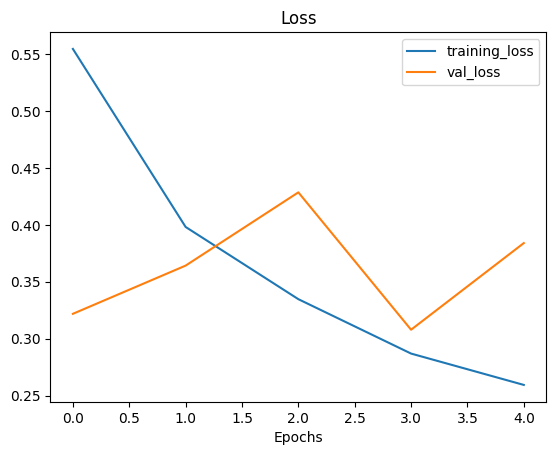

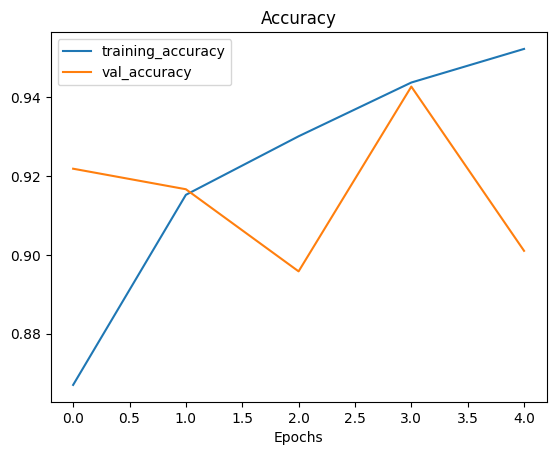

In [ ]:
plot_loss_curves(resnet_history_2)

In [ ]:
resnet_model.evaluate(test_data_leaves)

46/46 [==============================] - 158s 3s/step - loss: 0.4651 - accuracy: 0.8881


[0.465065598487854, 0.8881215453147888]

#Load and prep image


In [ ]:
def load_and_prep_image(filename):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [600,450])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

#Pred and plot

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 34ms/step


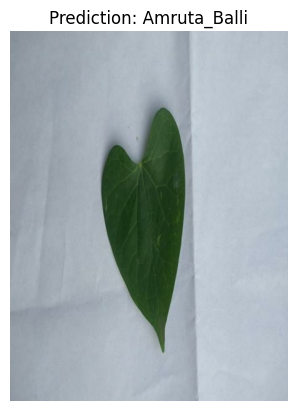

In [ ]:
pred_and_plot(resnet_model,"/content/Indian Medicininal Leaves Dataset-splitted/val/Amruthaballi/488.jpg",class_names)

1/1 [==============================] - 0s 34ms/step


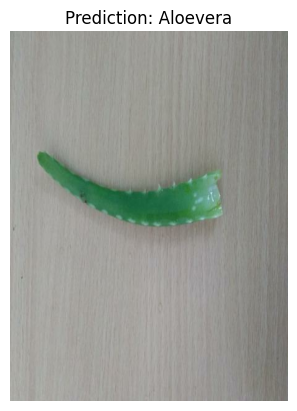

In [ ]:
pred_and_plot(resnet_model,"/content/Indian Medicininal Leaves Dataset-splitted/val/Aloevera/102.jpg",class_names)

1/1 [==============================] - 0s 87ms/step


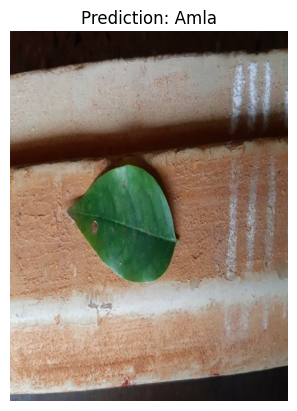

In [ ]:
pred_and_plot(resnet_model,"/content/Indian Medicininal Leaves Dataset-splitted/val/Amla/358.jpg",class_names)

#Gdrive mount

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Saving the trained model in Gdrive(sauptik3@gmail.com)

In [ ]:

path = f"/content/gdrive/My Drive/resnet_v2_model_3"
resnet_model.save(path)

NameError: ignored

#Loading the trained model from Gdrive(sauptik3@gmail.com)

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/model2')

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 66.3 MB/s eta 0:00:00


In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(model,"model_jlb")

['model_jlb']

In [ ]:
model_jlb2=joblib.load("model_jlb")

In [ ]:
model.save("/content/gdrive/MyDrive/2_resnet_v2_model(92.71%).h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

AttributeError: ignored

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 47.2 MB/s eta 0:00:00


In [ ]:
!pwd

/content


In [ ]:
model=tf.keras.models.load_model(model2,'/content/gdrive/MyDrive/model2')

NameError: ignored

In [ ]:
!mkdir tensorflow-js_model

In [ ]:
!tensorflowjs_converter --input_format=keras  /content/gdrive/MyDrive/model.h5 /content/tensorflow-js_model

2023-09-20 15:36:36.502506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip -r tensorflow-js_model.zip tensorflow-js_model

  adding: tensorflow-js_model/ (stored 0%)
  adding: tensorflow-js_model/group1-shard21of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard14of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard15of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard2of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard16of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard13of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard11of23.bin (deflated 6%)
  adding: tensorflow-js_model/group1-shard9of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard8of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard1of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard3of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard18of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard4of23.bin (deflated 7%)
  adding: tensorflow-js_model/group1-shard19of23.bin (deflated 7%)
  adding: tensorflow-js_m

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 80)                163920    
                                                                 
Total params: 23728720 (90.52 MB)
Trainable params: 163920 (640.31 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
model_first_layer=model.layers[0]
model_first_layer

In [ ]:
for layer_number,layer in enumerate(model_first_layer.layer):
  print(layer_number,layer.name,layer.trainable)

AttributeError: ignored

#Predicting random image


In [ ]:
import os
import random
# def predict_random_image(target_folder):
#   #target_folder=target_dir+"/"+target_class
#   #img=random.sample(os.listdir(target_folder),1)
#   img2=mpimg.imread(target_folder)
#   #random_img=target_folder+"/"+img[0]
#   plt.imshow(img2)
#   print(img2.shape)
# predict_random_image(target_folder="/content/image_2023-09-17_103006160.png")


1/1 [==============================] - 0s 25ms/step


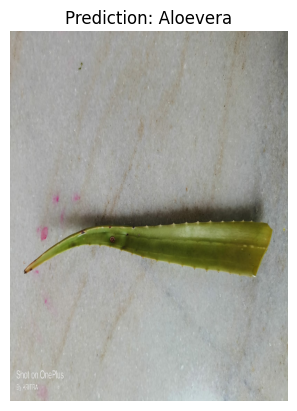

In [ ]:
img="/content/WhatsApp Image 2023-09-20 at 8.44.27 PM.jpeg"

pred_and_plot(model,img,class_names_leaves)

#Using mixed precision

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

#Data augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],name="data_augmentation")

#Inception_resnet_v2

In [ ]:
from tensorflow.keras import layers
input_shape=(600,450,3)
base_model=tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(len(class_names_leaves))(x)

outputs=layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)
model=tf.keras.Model(inputs,outputs)

#Compiling
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 600, 450, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1536)              0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 1536)              0         
                                                           

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 600, 450, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1536)              0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 1536)              0         
                                                           

In [ ]:
name_model=model.layers[2]

In [ ]:
for layer_number, layer in enumerate(name_model.layers):
  print(layer_number,layer.name,layer.trainable)

In [ ]:
name_model.trainable=True
for layer in name_model.layers[:-10]:
  layer.trainable=False
name_model.compile(loss="categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=["accuracy"])

In [ ]:
tf.get_logger().setLevel('ERROR')
initial_epochs=history_efficient_net_B1.epoch[-1]+1
epochs=initial_epochs+5
history_efficient_net_B1=model.fit(train_data,
                                   epochs=epochs,
                                   steps_per_epoch=len(train_data),
                                   initial_epoch=history_efficient_net_B1.epoch[-1],
                                   validation_data=test_data,
                                   validation_steps=int(0.15*len(test_data)),
                                   callbacks=model_checkpoint)

Epoch 6/11
129/129 [==============================] - 385s 3s/step - loss: 1.5589 - accuracy: 0.6568 - val_loss: 1.4549 - val_accuracy: 0.7031
Epoch 7/11
129/129 [==============================] - 362s 3s/step - loss: 1.4350 - accuracy: 0.6844 - val_loss: 1.2801 - val_accuracy: 0.7500
Epoch 8/11
129/129 [==============================] - 367s 3s/step - loss: 1.3126 - accuracy: 0.7177 - val_loss: 1.3251 - val_accuracy: 0.6719
Epoch 9/11
129/129 [==============================] - 332s 3s/step - loss: 1.2382 - accuracy: 0.7160 - val_loss: 1.3044 - val_accuracy: 0.6823
Epoch 10/11
129/129 [==============================] - 310s 2s/step - loss: 1.1587 - accuracy: 0.7487 - val_loss: 1.0425 - val_accuracy: 0.7604
Epoch 11/11
129/129 [==============================] - 302s 2s/step - loss: 1.1022 - accuracy: 0.7526 - val_loss: 1.1976 - val_accuracy: 0.7344


In [ ]:
model.evaluate(test_data)

46/46 [==============================] - 76s 2s/step - loss: 1.0942 - accuracy: 0.7624


[1.0942449569702148, 0.7624309659004211]

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 600, 450, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1536)              0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 80)                122960    
                                                                 
 softmax_float32 (Activatio  (None, 80)                0     

#Loading the weights of the model from previous epochs

In [ ]:
model.load_weights(checkpoint_path)

#Saving the inception model

In [ ]:
path = f"/content/gdrive/My Drive/inception_res_net_V2"
model.save(path)

#Resnet(importing from tensorflow)

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
input_shape=(600,450,3)
base_model=tf.keras.applications.resnet_v2.ResNet50V2(include_top=False)
base_model.trainable=True

inputs=layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(len(class_names_leaves))(x)

outputs=layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)
model=tf.keras.Model(inputs,outputs)
#Freezing every layer except the top 20
for layer in base_model.layers[:-20]:
  layer.trainable=False
#Compiling
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
# name_model.trainable=True
# for layer in name_model.layers[:-10]:
#   layer.trainable=False
# name_model.compile(loss="categorical_crossentropy",
#                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#                    metrics=["accuracy"])

In [ ]:
tf.get_logger().setLevel('ERROR')
# initial_epochs=history_efficient_net_B1.epoch[-1]
# epochs=initial_epochs+5
epochs=5
history_resnet_v2_1=model.fit(train_data,
                              epochs=epochs,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.15*len(test_data)),
                              callbacks=model_checkpoint)

Epoch 1/5
 33/129 [======>.......................] - ETA: 6:45 - loss: 4.3605 - accuracy: 0.0246

KeyboardInterrupt: ignored

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model output_format=tfjs_layers_model /content/gdrive/MyDrive/model2/saved_model.pb tensorflowjsmodel/

2023-09-21 00:49:49.772803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 00:49:51.277154: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: TensorFlow.js model converters.
       [-h]
       [--input_format {tf_hub,keras,keras_saved_model,tf_frozen_model,keras_keras,tfjs_layers_model,tf_saved_model}]
       [--output_format {tfjs_graph_model,keras,keras_saved_model,keras_keras,tfjs_layers_model}]
       [--signature_name SIGNATURE_NAME]
       [--saved_model_tags SAVED_MODEL_TAGS]
       [--quantize_float16 [QUANTIZE_FLOAT16]]
       [--quantize_uint8 [QUANTIZE_UINT8]]
       [--quantize_uint16 [QUANTIZE_UINT16]]
       [--quantization_bytes {1,2}]
       [--split_weights_by_layer]
      

In [ ]:
import tensorflowjs as tfjs

In [ ]:
!mkdir tensorflow_js_model

In [ ]:
tfjs.converters.save_keras_model(model,'/content/tensorflow_js_model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

In [ ]:
files.download('/content/model.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r tensorflow_js_model.zip tensorflow_js_model

  adding: tensorflow_js_model/ (stored 0%)
  adding: tensorflow_js_model/group1-shard5of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard22of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard17of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard19of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard18of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard4of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard13of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard21of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard9of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard8of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard7of23.bin (deflated 7%)
  adding: tensorflow_js_model/group1-shard20of23.bin (deflated 7%)
  adding: tensorflow_js_model/model.json (deflated 93%)
  adding: tensorflow_js_model/group1-shard14of23.bin (deflated 7%)
  adding: tensorflow_js_model/group